# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables.

# Author: R SUPRIYA

In [1]:
# Importing libraries
#To work with dataframe
import pandas as pd

#To work with numerical operations
import numpy as np

#To visualize the data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#To partition the data
from sklearn.model_selection import train_test_split

#importing libraries for linear regression and for finding metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [2]:
# Reading data from remote link
datas = "http://bit.ly/w-data"
data = pd.read_csv(datas)
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


# Data Pre-Processing

In [3]:
#To check variables data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# checking null(missing) values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# EXPLORE DATA ANALYSIS

In [5]:
# summary of numerical variables
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Relationship between independent variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualization

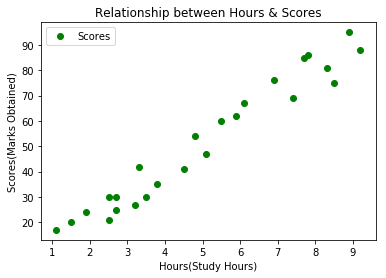

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o' , c ='green')
plt.title('Relationship between Hours & Scores')
plt.xlabel('Hours(Study Hours)')
plt.ylabel('Scores(Marks Obtained)')
plt.show()

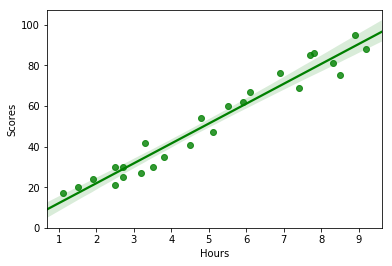

In [8]:
#Plotting the Regressionline
sns.regplot(x=data['Hours'],y=data['Scores'] , color='Green')

# Linear Regression Model

In [9]:
#storing the x & y values
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [10]:
#splitting the data into train and test
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2 , random_state = 0)

In [11]:
#Make an instance for the model
LR = LinearRegression()

#Fitting the values for x & y
LR.fit (train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#Prediction from the test data
prediction = LR.predict(test_x)
prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
test_y

array([20, 27, 69, 30, 62], dtype=int64)

In [14]:
data = pd.DataFrame({'ORIGINAL VALUES' : test_y , 'Predicted' : prediction})
data

,ORIGINAL VALUES,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
#printing the wrong values predictions 
print('MISS-CLASSIFICATION VALUES: %d' % (test_y !=prediction).sum())

MISS-CLASSIFICATION VALUES: 5


In [16]:
#Testing with your own data
print('NO OF HOURS: 9.25')
print("MARKS OBTAINED {}".format(LR.predict([[9.25]])))

NO OF HOURS: 9.25
MARKS OBTAINED [93.69173249]


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
#calculating metrics
MSE = mean_squared_error(test_y , prediction)
MSE

21.598769307217406

In [18]:
MAE = mean_absolute_error(test_y , prediction)
MAE

4.183859899002975